In [1]:
import pandas as pd
import numpy as np

In [7]:
def get_df_max_fitness_time(url_base, file_num):
     # read_csv from file on github, find the maximum fitness score and store in list
    fitness_scores = []
    elapsed_time = []
    generations_num = []
    for i in range(0, file_num):
        csv_name = url_base + str(i) + '.csv'
        df = pd.read_csv(csv_name)
        df = df.dropna(axis=0)
        fitness_scores.append(df[" best_fitness "].iloc[-1])
        # get the index of the row where the maximum score first occurs
        first_idx_max_score = df[' best_fitness '].idxmax()
        elapsed_time.append(df.iloc[first_idx_max_score][' time_elapsed'])
        generations_num.append(int(df.iloc[first_idx_max_score]['generations '].strip()))
    
    # make df 
    df_final = pd.DataFrame(data=fitness_scores, columns=['max_fitness_score'])
    df_final["time_to_max_fitness"] = elapsed_time
    df_final["gen_to_max_fitness"] = generations_num
    return df_final

## Schaffers

### Schaffers - Adaptive

In [18]:
url_base = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/SchaffersFio/SchaffersAdapt'
schaffers_adapt = get_df_max_fitness_time(url_base, 50)
schaffers_adapt["init"] = 'Adaptive Randomness'
schaffers_adapt["max_fitness_score"].mean()

9.999998168125328

In [22]:
schaffers_adapt.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,9.999968,1.960,1892,Adaptive Randomness
1,10.000000,1.482,1589,Adaptive Randomness
2,10.000000,2.058,1867,Adaptive Randomness
3,10.000000,1.827,1905,Adaptive Randomness
4,10.000000,1.788,1482,Adaptive Randomness


### Schaffers - Gaussian

In [19]:
url_base_1 = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/SchaffersFio/SchaffersGauss'
schaffers_gauss = get_df_max_fitness_time(url_base_1, 50)
schaffers_gauss["init"] = 'Gaussian'
schaffers_gauss['max_fitness_score'].mean()

9.99999912403433

In [21]:
schaffers_gauss.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,10.0,1.522,1638,Gaussian
1,10.0,1.663,1607,Gaussian
2,10.0,1.553,1665,Gaussian
3,10.0,1.688,1809,Gaussian
4,10.0,1.498,1600,Gaussian


### Schaffers - Opposition Based 

In [23]:
url_base_2 = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/SchaffersFio/SchaffersOppo'
schaffers_opp = get_df_max_fitness_time(url_base_2, 50)
schaffers_opp["init"] = 'Opposition Based'
schaffers_opp['max_fitness_score'].mean()

9.9999966181511

In [24]:
schaffers_opp.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,9.999926,1.934,1898,Opposition Based
1,10.000000,1.571,1584,Opposition Based
2,10.000000,1.449,1633,Opposition Based
3,10.000000,1.382,1552,Opposition Based
4,10.000000,1.586,1761,Opposition Based


### Schaffers - Uniform Random 

In [25]:
url_base_3 = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/SchaffersFio/SchaffersRandUnif'
schaffers_unifrand = get_df_max_fitness_time(url_base_3, 50)
schaffers_unifrand["init"] = 'Uniform Random'
schaffers_unifrand['max_fitness_score'].mean()

9.999986566040606

In [26]:
schaffers_unifrand.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,10.0,1.361,1548,Uniform Random
1,10.0,1.649,1846,Uniform Random
2,10.0,1.365,1547,Uniform Random
3,10.0,1.703,1650,Uniform Random
4,10.0,1.815,1697,Uniform Random


In [202]:
#concat all Schaffers results together
frames = [schaffers_adapt, schaffers_gauss, schaffers_opp, schaffers_unifrand]
schaffers_results = pd.concat(frames)

In [203]:
schaffers_results["gen_to_max_fitness"] = schaffers_results["gen_to_max_fitness"].astype(float)

### Schaffers - ANOVA

In [204]:
%matplotlib inline

from __future__ import print_function
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

#### Elapsed time to max fitness

In [205]:
mod = ols('time_to_max_fitness ~ init', data=schaffers_results).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq     df         F    PR(>F)
init      0.563442    3.0  3.953494  0.009117
Residual  9.311146  196.0       NaN       NaN


#### Max Fitness Score

In [206]:
mod = ols('max_fitness_score ~ init', data=schaffers_results).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
init      5.036902e-09    3.0  2.549537  0.056991
Residual  1.290735e-07  196.0       NaN       NaN


#### Num of generations to max fitness

In [207]:
mod = ols('gen_to_max_fitness ~ init', data=schaffers_results).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq     df        F    PR(>F)
init         3508.98    3.0  0.06046  0.980479
Residual  3791802.44  196.0      NaN       NaN


In [218]:
# testing for the separate initiation methods
grouped_schaffers=schaffers_results.groupby(['init'])
f_val, p_val = stats.f_oneway(grouped_schaffers.get_group('Adaptive Randomness')['time_to_max_fitness'], grouped_schaffers.get_group('Uniform Random')['time_to_max_fitness'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 10.793495584118183 , P = 0.001413739864419087


### Schaffers - BoxPlot

In [33]:
data_1 = schaffers_results[schaffers_results["init"] == "Uniform Random"]["time_to_max_fitness"]
data_2 = schaffers_results[schaffers_results["init"] == "Gaussian"]["time_to_max_fitness"]
data_3 = schaffers_results[schaffers_results["init"] == "Opposition Based"]["time_to_max_fitness"]
data_4 = schaffers_results[schaffers_results["init"] == "Adaptive Randomness"]["time_to_max_fitness"]

In [34]:
data_to_plot = [data_1, data_2, data_3, data_4]

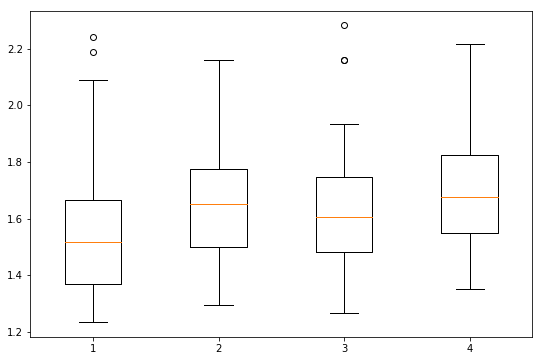

In [35]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Katsuura 

### Katsuura - Adaptive Randomness

In [141]:
k_url_base = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/KatsuuraFio/KatsuuraAdapt'
katsuura_adapt = get_df_max_fitness_time(k_url_base, 100)
katsuura_adapt["init"] = 'Adaptive Randomness'
katsuura_adapt["max_fitness_score"].mean()

9.45700522776766

In [148]:
katsuura_adapt.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,10.000000,10.461,11275,Adaptive Randomness
1,9.166304,17.600,22849,Adaptive Randomness
2,10.000000,9.128,13059,Adaptive Randomness
3,6.371973,18.145,24179,Adaptive Randomness
4,10.000000,12.733,13453,Adaptive Randomness


### Katsuura - Gaussian

In [154]:
k_url_base_1 = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/KatsuuraFio/KatsuuraGauss'
katsuura_gauss = get_df_max_fitness_time(k_url_base_1, 100)
katsuura_gauss["init"] = 'Gaussian'
katsuura_gauss['max_fitness_score'].mean()

8.765708650261239

In [155]:
katsuura_gauss.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,10.000000,9.209,12253,Gaussian
1,10.000000,9.001,12821,Gaussian
2,10.000000,9.423,12481,Gaussian
3,5.296864,16.099,24595,Gaussian
4,5.622455,16.657,22347,Gaussian


### Katsuura - Opposition Based 

In [139]:
k_url_base_2 = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/KatsuuraFio/KatsuuraOppo'
katsuura_opp = get_df_max_fitness_time(k_url_base_2, 100)
katsuura_opp["init"] = 'Opposition Based'
katsuura_opp['max_fitness_score'].mean()

9.140336175944737

In [144]:
katsuura_opp.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,10.000000,9.226,12824,Opposition Based
1,10.000000,129.125,12414,Opposition Based
2,7.291547,13.911,22639,Opposition Based
3,7.291547,14.453,23405,Opposition Based
4,10.000000,8.218,13133,Opposition Based


### Katsuura - Uniform Random

In [137]:
k_url_base_3 = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/KatsuuraFio/KatsuuraRandUnif'
katsuura_unifrand = get_df_max_fitness_time(k_url_base_3, 100)
katsuura_unifrand["init"] = 'Uniform Random'
katsuura_unifrand['max_fitness_score'].mean()

9.029471965425614

In [146]:
katsuura_unifrand.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,10.0,7.633,11676,Uniform Random
1,10.0,8.261,12053,Uniform Random
2,10.0,7.828,12417,Uniform Random
3,10.0,8.066,12846,Uniform Random
4,10.0,9.332,14042,Uniform Random


In [157]:
#concat all katsuura results together
frames_k = [katsuura_adapt, katsuura_gauss, katsuura_opp, katsuura_unifrand]
katsuura_results = pd.concat(frames_k)

In [158]:
katsuura_results["gen_to_max_fitness"] = katsuura_results["gen_to_max_fitness"].astype(float)

### Katsuura - ANOVA

#### Elapsed time to Max Fitness

In [220]:
mod_k = ols('time_to_max_fitness ~ init', data=katsuura_results).fit()
aov_table_k = sm.stats.anova_lm(mod_k, typ=2)
print(aov_table_k)

                sum_sq     df         F    PR(>F)
init       1508.066538    3.0  2.529067  0.056922
Residual  78710.771202  396.0       NaN       NaN


#### Max Fitness Score

In [160]:
mod_k = ols('max_fitness_score ~ init', data=katsuura_results).fit()
aov_table_k = sm.stats.anova_lm(mod_k, typ=2)
print(aov_table_k)

               sum_sq     df         F    PR(>F)
init        24.579067    3.0  2.219126  0.085411
Residual  1462.033876  396.0       NaN       NaN


#### Number of generations to Max Fitness

In [161]:
mod_k = ols('max_fitness_score ~ init', data=katsuura_results).fit()
aov_table_k = sm.stats.anova_lm(mod_k, typ=2)
print(aov_table_k)

               sum_sq     df         F    PR(>F)
init        24.579067    3.0  2.219126  0.085411
Residual  1462.033876  396.0       NaN       NaN


In [231]:
# testing for different init methods
grouped_katsuura = katsuura_results.groupby(['init'])
f_val, p_val = stats.f_oneway(grouped_katsuura.get_group('Uniform Random')['max_fitness_score'], grouped_katsuura.get_group('Opposition Based')['max_fitness_score'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.17098272282838575 , P = 0.6796874064338416


### Katsuura - BoxPlot

In [86]:
data_1 = katsuura_results[katsuura_results["init"] == "Uniform Random"]["time_to_max_fitness"]
data_2 = katsuura_results[katsuura_results["init"] == "Gaussian"]["time_to_max_fitness"]
data_3 = katsuura_results[katsuura_results["init"] == "Opposition Based"]["time_to_max_fitness"]
data_4 = katsuura_results[katsuura_results["init"] == "Adaptive Randomness"]["time_to_max_fitness"]

In [87]:
data_to_plot = [data_1, data_2, data_3, data_4]

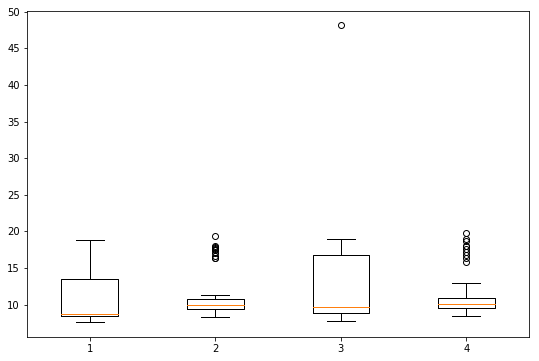

In [88]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(data_to_plot)

## Bent Cigar Function

### Ben Cigar - Adaptive Randomness

In [107]:
b_url_base = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/BentCigarFio/BentCigarAdapt'
bent_adapt = get_df_max_fitness_time(b_url_base, 100)
bent_adapt["init"] = 'Adaptive Randomness'
bent_adapt["max_fitness_score"].mean()

9.89524553610881

In [108]:
bent_adapt.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,9.999830,0.311,2358,Adaptive Randomness
1,9.999987,0.204,2491,Adaptive Randomness
2,9.993716,0.217,2494,Adaptive Randomness
3,9.999975,0.249,2451,Adaptive Randomness
4,9.987041,0.288,2491,Adaptive Randomness


### Bent Cigar - Gaussian

In [109]:
b_url_base_1 = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/BentCigarFio/BentCigarGauss'
bent_gauss = get_df_max_fitness_time(b_url_base_1, 100)
bent_gauss["init"] = 'Gaussian'
bent_gauss['max_fitness_score'].mean()

9.993989284741877

In [110]:
bent_gauss.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,9.999998,0.185,2360,Gaussian
1,9.996917,0.191,2486,Gaussian
2,9.999984,0.181,2201,Gaussian
3,9.999998,0.258,2485,Gaussian
4,9.999998,0.348,2450,Gaussian


### Bent Cigar - Opposition Based

In [111]:
b_url_base_2 = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/BentCigarFio/BentCigarOppo'
bent_opp = get_df_max_fitness_time(b_url_base_2, 100)
bent_opp["init"] = 'Opposition Based'
bent_opp['max_fitness_score'].mean()

9.830780928423765

In [112]:
bent_opp.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,9.999960,0.216,2495,Opposition Based
1,9.999992,0.181,2270,Opposition Based
2,9.999931,0.196,2467,Opposition Based
3,9.999980,0.194,2475,Opposition Based
4,9.999864,0.471,2481,Opposition Based


### Bent Cigar - Uniform Random

In [113]:
b_url_base_3 = 'https://raw.githubusercontent.com/LittlePea13/evo_comp_43/pere/BentCigarFio/BentCigarRandUnif'
bent_unifrand = get_df_max_fitness_time(b_url_base_3, 100)
bent_unifrand["init"] = 'Uniform Random'
bent_unifrand['max_fitness_score'].mean()

9.886569333856478

In [114]:
bent_unifrand.head()

,max_fitness_score,time_to_max_fitness,gen_to_max_fitness,init
0,9.999983,0.292,2491,Uniform Random
1,9.999986,0.258,2489,Uniform Random
2,6.112768,0.205,2495,Uniform Random
3,9.999977,0.198,2285,Uniform Random
4,9.999939,0.452,2484,Uniform Random


In [115]:
#concat all the frames together
frames_b = [bent_adapt, bent_gauss, bent_opp, bent_unifrand]
bent_results = pd.concat(frames_b)

In [116]:
bent_results["gen_to_max_fitness"] = bent_results["gen_to_max_fitness"].astype(float)

In [117]:
bent_results.shape

(400, 4)

### Bent Cigar - ANOVA

####  Elapsed time to max fitness

In [118]:
mod_b = ols('time_to_max_fitness ~ init', data=bent_results).fit()

In [119]:
aov_table_b = sm.stats.anova_lm(mod_b, typ=2)

In [120]:
print(aov_table_b)

            sum_sq     df         F    PR(>F)
init      0.052943    3.0  2.785037  0.040591
Residual  2.509309  396.0       NaN       NaN


#### Max fitness score

In [93]:
mod_b_2 = ols('max_fitness_score ~ init', data=bent_results).fit()

In [94]:
aov_table_b_2 = sm.stats.anova_lm(mod_b_2, typ=2)

In [95]:
print(aov_table_b_2)

              sum_sq     df         F    PR(>F)
init        1.226056    3.0  0.709306  0.547508
Residual  112.930544  196.0       NaN       NaN


#### Number of Generations to Max Fitness

In [123]:
mod_b_3 = ols('gen_to_max_fitness ~ init', data=bent_results).fit()

In [124]:
aov_table_b_3 = sm.stats.anova_lm(mod_b_3, typ=2)

In [125]:
print(aov_table_b_3)

              sum_sq     df         F    PR(>F)
init        44510.62    3.0  1.780061  0.150379
Residual  3300673.54  396.0       NaN       NaN


In [237]:
# testing for different init methods
grouped_bentcigar = bent_results.groupby(['init'])
f_val, p_val = stats.f_oneway(grouped_bentcigar.get_group('Gaussian')['time_to_max_fitness'], grouped_bentcigar.get_group('Uniform Random')['time_to_max_fitness'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 5.132785553340853 , P = 0.024560204750289236


### Bent Cigar - BoxPlot

In [126]:
data_1 = bent_results[bent_results["init"] == "Uniform Random"]["time_to_max_fitness"]
data_2 = bent_results[bent_results["init"] == "Gaussian"]["time_to_max_fitness"]
data_3 = bent_results[bent_results["init"] == "Opposition Based"]["time_to_max_fitness"]
data_4 = bent_results[bent_results["init"] == "Adaptive Randomness"]["time_to_max_fitness"]

In [127]:
data_to_plot = [data_1, data_2, data_3, data_4]

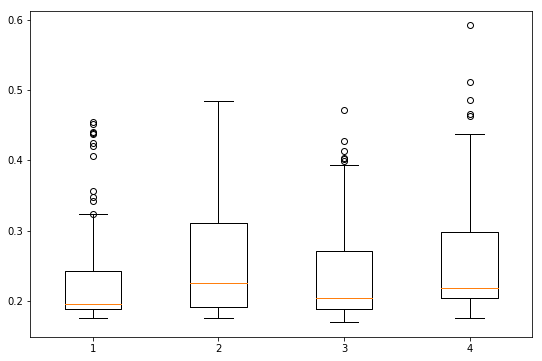

In [128]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(data_to_plot)